In [1]:
import cv2
import sys
sys.path.append("./TagDetection/")
from apriltag import Apriltag
from matplotlib import pyplot as plt

In [2]:
from readData import *
from showFig import *
from showCloud import *
from warp import *
from transform import Transformer


tf = Transformer()


In [3]:
def plotMarkers(frame, detections, name=None):
    plt.figure().set_size_inches(20, 10)
    plt.imshow(frame)
    # plt.gray()
    for detection in detections:
        convex = np.array(detection.points)
        showpoint = np.array(detection.markers)
        plt.plot(showpoint[:, 1], showpoint[:, 0], 'rx')
        plt.plot(convex[:, 0, 0], convex[:, 0, 1], 'b.')
    plt.imshow(frame)
    plt.gray()
    if name:
        plt.savefig(name)
    # plt.show()


def findMarker(num=4):
    ap = Apriltag()
    ap.create_detector(family='tag16h5', debug=False)
    for i in range(num):
        points, frame = getPoints("..\marker\marker%d.npy"%i)
        detections = ap.detect(frame)
        if len(detections) > 0:
            print(len(detections))
            print('%d 识别成功'%i)
            plotMarkers(frame, detections, "marker%d.png"%i)
        else:
            print('%d 识别失败'%i)

def addColor(points, colorm):
    color = colorm.copy().reshape(-1,1)
    cpoints = np.hstack([points, color])
    return cpoints

In [4]:
# findMarker(6)

In [5]:
ap = Apriltag()
ap.create_detector(family='tag16h5', debug=False)

read in ..\marker\marker0.npy
x range: -196 ~ 1216
y range: -901 ~ 145
z range: -9882 ~ 364
2
识别成功


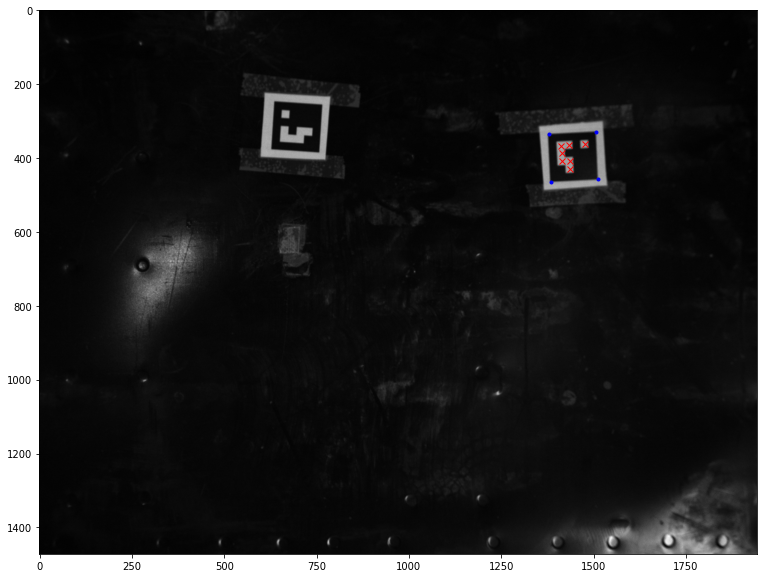

In [6]:
cloud0, frame0 = getPoints("..\marker\marker0.npy")
detections = ap.detect(frame0)
if len(detections) > 0:
    print(len(detections))
    print('识别成功')
    plotMarkers(frame0, [detections[0]])
    points = tf.pix2point(detections[0].points, cloud0)
    points += tf.pix2point(detections[1].points, cloud0)
    tf.tgt = np.asarray(points)
else:
    print('识别失败')

In [7]:
cpoints = addColor(cloud0, frame0)
dcloud = filterPoints(cpoints, (200, 150, (-100, -30)), skip=20)
fig = dynVisual([dcloud], ["tgt"])
fig.write_html("tgt.html")

read in ..\marker\marker1.npy
x range: -196 ~ 226
y range: -153 ~ 145
z range: -493 ~ -33
4
识别成功


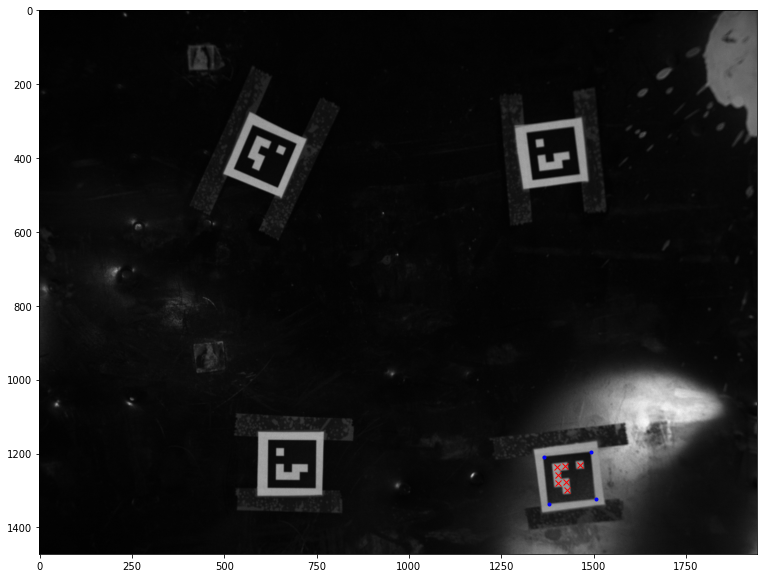

In [8]:
cloud1, frame1 = getPoints("..\marker\marker1.npy")
detections = ap.detect(frame1)
if len(detections) > 0:
    print(len(detections))
    print('识别成功')
    plotMarkers(frame1, [detections[0]])
    points = tf.pix2point(detections[0].points, cloud1)
    points += tf.pix2point(detections[1].points, cloud1)
    tf.src = np.asarray(points)
else:
    print('识别失败')

In [25]:
cpoints = addColor(cloud1, frame1)
dcloud = filterPoints(cpoints, (200, 150, (-100, -30)), skip=20)
fig = dynVisual([dcloud], ["src"])
fig.write_html("src.html")

In [9]:
T = tf.fit()
transCloud = tf.transform(cloud1)

In [10]:
tf.tgt

array([[109.28876 ,  78.211586, -58.54813 ],
       [110.823395,  52.477524, -58.10756 ],
       [ 84.81011 ,  50.923496, -57.813343],
       [ 83.77515 ,  77.06902 , -59.0995  ],
       [-66.65897 ,  95.09901 , -55.09214 ],
       [-40.59306 ,  93.26015 , -55.613174],
       [-42.473236,  67.237   , -53.732513],
       [-68.341446,  69.09414 , -53.177483]], dtype=float32)

In [11]:
tf.src

array([[ 106.24218 ,  -97.25826 ,  -46.297142],
       [ 109.10611 , -122.94385 ,  -45.42459 ],
       [  83.299164, -125.76793 ,  -45.173206],
       [  80.69166 ,  -99.96188 ,  -46.64017 ],
       [ -70.25574 ,  -89.80111 ,  -41.718483],
       [ -44.176613,  -90.16849 ,  -42.476475],
       [ -44.6169  , -116.22072 ,  -40.614567],
       [ -70.70082 , -115.85741 ,  -40.000137]], dtype=float32)

In [12]:
cpoints0 = addColor(cloud0, frame0)
cpoints1 = addColor(transCloud, frame1)
dcloud0 = filterPoints(cpoints0, (400, 300, (-100, -30)), skip=20)
dcloud1 = filterPoints(cpoints1, (400, 300, (-100, -30)), skip=20)
fig = dynVisual([dcloud0, dcloud1], ["tgt", "src"])
fig.write_html("merge.html")